In [1]:
# First, let's import the libraries
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statistics
from wordcloud import WordCloud, STOPWORDS

### Getting the data

Now, we need to fetch the data

In [2]:
# Importing the data from data folder
df_calendar = pd.read_csv('../data/calendar.csv')
df_listin = pd.read_csv('../data/listings.csv')
df_reviews = pd.read_csv('../data/reviews.csv')

### Data Understanding

In this section I will learn more about data and its characteristics. 

#### df_calendar

First, let's check how the data is presented in each one, starting with df_calendar

In [3]:
# Checking the first 5 values
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,53344884,2022-09-22,t,"$3,500.00","$3,500.00",3.0,365.0
1,53344884,2022-09-23,t,"$3,500.00","$3,500.00",3.0,365.0
2,53344884,2022-09-24,t,"$3,500.00","$3,500.00",3.0,365.0
3,53344884,2022-09-25,t,"$3,500.00","$3,500.00",3.0,365.0
4,53344884,2022-09-26,t,"$3,500.00","$3,500.00",3.0,365.0


In [4]:
# Checking the number of unique locals to rent
len(df_calendar.listing_id.unique())

26366

In [5]:
# Checking the dataset description
df_calendar.date.describe

<bound method NDFrame.describe of 0          2022-09-22
1          2022-09-23
2          2022-09-24
3          2022-09-25
4          2022-09-26
              ...    
9623159    2023-09-16
9623160    2023-09-17
9623161    2023-09-18
9623162    2023-09-19
9623163    2023-09-20
Name: date, Length: 9623164, dtype: object>

After this quick analysis, we can conclude that:
- In this dataset we have future dates, showing which days the place will be available for rent and which days it is already booked until the date of 2023-09-20. Together, we also have some features, such as the minimum and maximum number of days to rent and the rent amount.

#### df_listin

Now, let's check the next dataset

In [6]:
# Checking the first 5 values
df_listin.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,53344884,https://www.airbnb.com/rooms/53344884,20220921172238,2022-09-22,city scrape,Suntuoso apartamento em Copacabana posto 6,suntuoso apartamento de frente para o mar <br ...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,431412286,...,NaN,NaN,NaN,NaN,t,10,8,2,0,NaN
1,7801456,https://www.airbnb.com/rooms/7801456,20220921172238,2022-09-22,city scrape,Ipanema Vieira Souto - Linda Vista,Flat luxuoso com a melhor localização do Rio d...,"Ipanema é considerado o berço do rio, cheio de...",https://a0.muscache.com/pictures/99276394/dc9c...,40650139,...,NaN,NaN,NaN,NaN,t,5,5,0,0,NaN
2,14333905,https://www.airbnb.com/rooms/14333905,20220921172238,2022-09-22,city scrape,Casa compartilhada,"A 15 min. do complexo esportivo de Deodoro, Ca...",NaN,https://a0.muscache.com/pictures/15235501-16c4...,87749071,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
3,44708736,https://www.airbnb.com/rooms/44708736,20220921172238,2022-09-22,city scrape,Aluguel de Lancha no Rio de Janeiro,Iate Intermarine 440 Full Gold c/ Fly p/ até 1...,A Marina da Glória fica no bairro do Flamengo ...,https://a0.muscache.com/pictures/210e9877-2854...,97164727,...,5.0,5.0,5.0,NaN,f,2,2,0,0,0.1
4,35351763,https://www.airbnb.com/rooms/35351763,20220921172238,2022-09-22,city scrape,Uma grande família,"Estou oferecendo minha casa ,minha família meu...",São Mateus,https://a0.muscache.com/pictures/44713611-925b...,249666532,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN


In [7]:
# Checking the columns
df_listin.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

After this quick analysis, we can conclude that:
- In this dataset we have information about the places, such as number of rooms, average grade, location, neighborhood and information that is also in the df_calendar.

#### df_reviews

Go to the last dataset

In [8]:
# Checking the values
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,17878,64852,2010-07-15,135370,Tia,This apartment is in a perfect location -- two...
1,17878,76744,2010-08-11,10206,Mimi,we had a really great experience staying in Ma...
2,17878,91074,2010-09-06,80253,Jan,Staying in Max appartment is like living in a ...
3,17878,137528,2010-11-12,230449,Orene,In general very good and reasonable price.\r<b...
4,17878,147594,2010-12-01,219338,David,The apt was nice and in a great location only ...


There isn't much of a secret here, both by name and by the first few lines, this dataset contains information regarding the reviews made by those who have already rented the place.

#### Conclusion

After a quick assessment, we can summarize the findings in:

- <b>df_calendar:</b> In this dataset we have future dates, showing which days the place will be available for rent and which days it is already booked until the date of 2023-09-20. Together, we also have some features, such as the minimum and maximum number of days to rent and the rent amount.
- <b>df_listin:</b> In this dataset we have information about the places, such as number of rooms, average grade, location, neighborhood and information that is also in the df_calendar.
- <b>df_review:</b> In this dataset we have reviews from people who have already rented the place.

From this, some questions arise:

- Which areas of Rio de Janeiro have the highest ratings?

- What are the most common words in reviews?

- How is the vacancy situation for the year 2023, are there already many rental reservations? On which months?

### EDA

After better understanding the datasets, we are now going to seek insights from the data, answering the previously proposed questions.

#### 1. Which areas of Rio de Janeiro have the highest ratings?

When we travel, we are always concerned with the quality of the place of stay, so let's explore the data to answer the above question.

In [9]:
def Map_Scores(dataframe):
    """
    Generates a heat map of the best rated places
    :param dataframe: dataframe with coordinates and ratings 
    :return: heat map with areas and ratings
    """
    
    # Getting center coordinates
    rj_coordinates = (dataframe['latitude'].mean(), dataframe['longitude'].mean())
    
    # Creating the map
    map_rj = folium.Map(location=rj_coordinates, zoom_start=10)
    
    # Shading the areas
    heatmap = HeatMap(data=dataframe[['latitude', 'longitude', 'review_scores_rating']].groupby(['latitude', 'longitude']).mean().dropna().reset_index().values.tolist(), radius=11, max_zoom=13)
    heatmap.add_to(map_rj)
    
    
    return map_rj

In [10]:
# Generate and view the map
map = Map_Scores(df_listin)
map

- The waterfront area usually has better scores than places farther from the beach.

#### 2. What are the most common words in reviews?

From the reviews, we can identify praise and criticism of the places, in addition to several other things, let's use this to understand how the place is usually evaluated. This can be used to make improvements.

first, lets check for missing values

In [11]:
# Checking for missing values
df_reviews.isna().sum()/len(df_reviews)

listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.000022
dtype: float64

We have a very insignificant amount of NaN's, representing less than 1%. Because they are present in the ``comments`` column, which is a text variable, I will choose to drop the column because I cannot input categorical values.

In [12]:
# Dropping the missing values
df_review_droppedNan = df_reviews.dropna()

Now, we will carry out an important step to visualize this data, which is to combine the ``reviews`` into a large text.

In [13]:
# Putting together the words of the reviews
summary = " ".join(s for s in df_review_droppedNan.comments)

For a good visualization, we will need to configure StopWords, which are words that appear frequently in the texts and do not add much value to the insights. For the next step, let's configure these words and generate the visualization.

In [14]:
# Creating a set of words that will be excluded
stopwords = set(STOPWORDS)
stopwords.update(["da", "meu", "em", "você", "de", "ao", "os", "é", 'br'])

# Creating the word cloud
img_wordcloud = WordCloud(stopwords=stopwords,
                          background_color='black',
                          width=1600,
                          height=800).generate(summary)

Let's see the result:

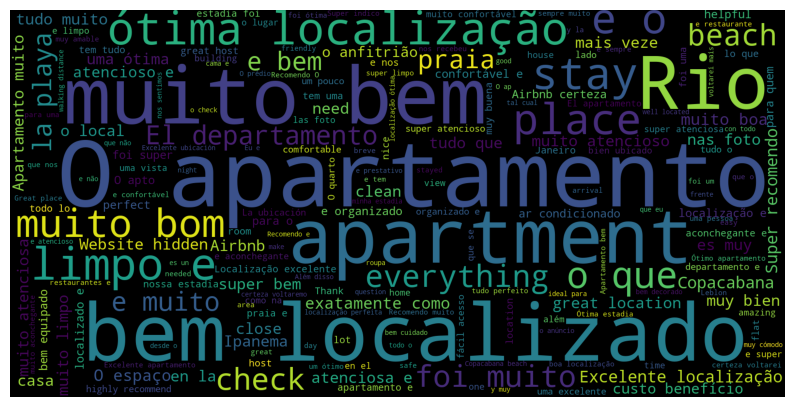

In [15]:
# Plotting the word cloud
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(img_wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(img_wordcloud)

From this word cloud we can see the following things from the reviews:

- Natives from countries that speak Portuguese, English or Spanish are common.
- The cleanliness and organization of the properties are usually praised.
- The location is also often praised, perhaps related to the beach and the view, which also appear in the word cloud.

#### 3. How is the vacancy situation for the year 2023, are there already many rental reservations? On which months?

When we decide to stay somewhere, it's important to check availability, to avoid running out of places on the intended date. As the year is already 2023, let's check the availability for that year.

Let's check if the ``date`` is in the format we need.

In [16]:
# Checking the info about the dataframe
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9623164 entries, 0 to 9623163
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 513.9+ MB


It is not in the correct format, we will need to change it.

In [17]:
# Changing the data type
df_calendar['date'] = pd.to_datetime(df_calendar.date)

Now that the ``date`` is already in ``datetime`` format, which is what we want, let's separate the data from 2023.

In [18]:
# Selecting data for 2023
df_2023 = df_calendar[df_calendar.date.dt.year == 2023]

Out of curiosity, let's check up to what date we have data.

In [19]:
# Checking the min
print(df_2023.date.min())

# Checking the max
print(df_2023.date.max())

2023-01-01 00:00:00
2023-10-01 00:00:00


Our data goes up to October 2023.

For more information, let's group our data and check how many reservations have already been made for that year.

In [25]:
# Grouping data
df_aval_2023 = df_2023.groupby('listing_id').available.value_counts().to_frame()
df_aval_2023.rename(columns={'available':'days'}, inplace = True)
df_aval_2023.reset_index(inplace=True)

In [26]:
# Checking the shape of unavailable places
df_aval_2023[df_aval_2023.available == 'f'].shape[0]

19251

- January to October has 273 days.
- For at least 1 day, 19251 different appointments have already been made for the year 2023.

After the discoveries, let's move on to the visualization. First, I'm going to make a copy of the dataset in case we need the original in the future. In the copy I will create a new column.

In [27]:
# Copying the dataset
df_2023_day = df_2023

In [28]:
# Adding a new variable
df_2023_day['day'] = df_2023_day.date.dt.day

C:\Users\Daniel\AppData\Local\Temp\ipykernel_10336\4258845798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023_day['day'] = df_2023_day.date.dt.day


After creating the copy and the new column, let's group and visualize the data.

Text(0.5, 1.0, 'Availability of locations by month')

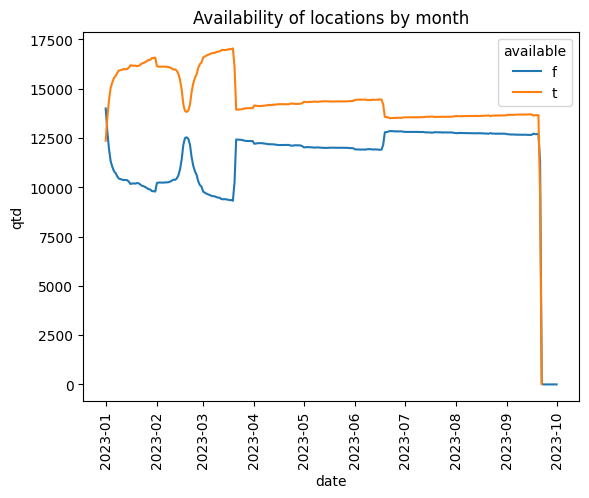

In [20]:
# Grouping the data
df_t = df_2023.groupby([df_2023.date]).available.value_counts().to_frame()
df_t = df_t.rename(columns={'available':'qtd'})
df_t.reset_index(inplace=True)

# Plotting a graph
sns.lineplot(data = df_t, x = 'date', y = 'qtd', hue = 'available')
plt.xticks(rotation = 90)
plt.title('Availability of locations by month')

- At the beginning of January, we can see that there is a drop in bookings, most likely because a lot of people go to Rio de Janeiro to celebrate the new year.
- There is another sharp increase in bookings between February and March, which must be due to Carnival.
- There is another increase between the end of March and the beginning of April, which is when the festivities of All Saints in Brazil begin and also when Cold Play shows will take place, on the 25th, 26th and 28th of March.